In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [45]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100039 entries, 63829 to 85084
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 100039 non-null  int64  
 1   year                               100039 non-null  int64  
 2   loan_amount                        100039 non-null  int64  
 3   rate_of_interest                   100039 non-null  float64
 4   Interest_rate_spread               100039 non-null  float64
 5   Upfront_charges                    100039 non-null  float64
 6   property_value                     100039 non-null  float64
 7   income                             100039 non-null  float64
 8   Credit_Score                       100039 non-null  int64  
 9   LTV                                100039 non-null  float64
 10  dtir1                              100039 non-null  float64
 11  loan_limit_ncf                     100039

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [48]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [49]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train:')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)

    print('Test:')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)
    
    return model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn_no_params = KNeighborsClassifier()

In [52]:
knn_no_params = build_model(knn_no_params, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[72215  2993]
 [12329 12502]]
Accuracy score:  0.8468397325043233
Precision score:  0.8068409164246532
Recall score:  0.5034835487898192
F1 score:  0.62004662004662
Test:
Confusion matrix: 
 [[29925  2307]
 [ 6363  4279]]
Accuracy score:  0.7977795400475813
Precision score:  0.6497115092620711
Recall score:  0.4020860740462319
F1 score:  0.49674947759461335


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {
    'n_neighbors': [25, 30, 35, 40],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [55]:
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score)

In [56]:
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring=f1_scorer)
knn_cv = build_model(knn_cv, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[75208     0]
 [    0 24831]]
Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
Test:
Confusion matrix: 
 [[31279   953]
 [ 6692  3950]]
Accuracy score:  0.8216868031907449
Precision score:  0.805629206608199
Recall score:  0.3711708325502725
F1 score:  0.5082019942103569


In [57]:
knn_cv.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [58]:
knn_cv.best_score_

0.5049642699356397

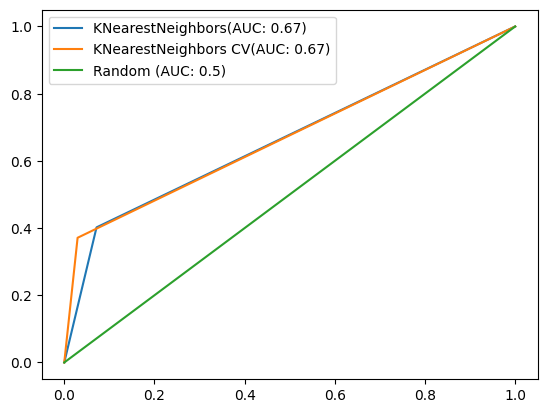

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn_no_params, knn_cv.best_estimator_]
model_names = ['KNearestNeighbors', 'KNearestNeighbors CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')
plt.legend()
plt.show()

In [60]:
from joblib import dump
dump(models, 'knn.joblib')

['knn.joblib']